In [1]:
folder_name = '/Users/justinyu/Desktop/TechX03/musiclab_data'

In [2]:
cd '/Users/justinyu/Desktop/TechX03/musiclab_data'

/Users/justinyu/Desktop/TechX03/musiclab_data


In [3]:
ls

autoplay_w1_v1.txt                     dynamics_listens_w2_v1.txt
autoplay_w1_v2.txt                     dynamics_listens_w2_v2.txt
autoplay_w1_v3.txt                     dynamics_listens_w2_v3.txt
autoplay_w1_v4.txt                     dynamics_listens_w2_v4.txt
autoplay_w2_v1.txt                     dynamics_listens_w3_v1.txt
autoplay_w2_v2.txt                     dynamics_listens_w3_v2.txt
autoplay_w2_v3.txt                     dynamics_listens_w3_v3.txt
autoplay_w2_v4.txt                     dynamics_listens_w3_v4.txt
autoplay_w3_v1.txt                     dynamics_listens_w4_v1.txt
autoplay_w3_v2.txt                     dynamics_listens_w4_v2.txt
autoplay_w3_v3.txt                     dynamics_listens_w4_v4.txt
autoplay_w3_v4.txt                     dynamics_listens_w5_v1.txt
autoplay_w4_v1.txt                     dynamics_listens_w5_v2.txt
autoplay_w4_v2.txt                     dynamics_listens_w6_v1.txt
autoplay_w4_v4.txt                     dynamics_listens_w6_v2.txt
autoplay_w

In [4]:
import pandas as pd
column_names = ['song_id', 'downloads_in_world1',
                  'downloads_in_world2', 'downloads_in_world3',
                  'downloads_in_world4', 'downloads_in_world5', 
                  'downloads_in_world6', 'downloads_in_world7', 
                  'downloads_in_world8', 'downloads_in_world_independent']

df1 = pd.read_csv('downloads_v1_lexorder.txt',  names=column_names )
df2 = pd.read_csv('downloads_v2_lexorder.txt',  names=column_names )

df1.head()

,song_id,downloads_in_world1,downloads_in_world2,downloads_in_world3,downloads_in_world4,downloads_in_world5,downloads_in_world6,downloads_in_world7,downloads_in_world8,downloads_in_world_independent
0,100102,15,10,18,40,14,25,37,28,44
1,123111,18,14,14,14,8,12,18,29,35
2,131405,7,10,12,9,5,14,14,10,20
3,144102,11,16,12,16,15,17,16,21,37
4,165411,9,32,8,18,9,19,23,20,38


In [5]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [6]:
worlds = ['downloads_in_world1',
    'downloads_in_world2', 'downloads_in_world3',
    'downloads_in_world4', 'downloads_in_world5', 
    'downloads_in_world6', 'downloads_in_world7', 
    'downloads_in_world8', 'downloads_in_world_independent'] 

gini_list1 = []
for i in worlds:
    print(gini(df1[i]))
    gini_list1.append(gini(df1[i]))

0.3343797564687976
0.37385091926458835
0.4175204918032787
0.3333572522005358
0.37883554083885207
0.2837658898305085
0.3002015465613689
0.2998829873829874
0.2438212927756654


In [7]:
gini_list2 = []
for i in worlds:
    print(gini(df2[i]))
    gini_list2.append(gini(df2[i]))

0.4568437806072478
0.5090823002754821
0.5321842301943199
0.4461128739800544
0.5019724977457168
0.5013090166844161
0.47546779808529155
0.5611936936936937
0.18721487226277372


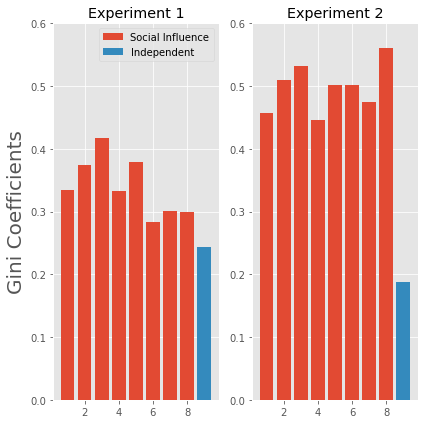

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

plt.figure(figsize = [6, 6])
plt.subplot(121)
plt.bar(range(1, 9), gini_list1[:-1], label = 'Social Influence')
plt.bar(9, gini_list1[-1], label = 'Independent')
plt.ylabel('Gini Coefficients', fontsize = 20)
plt.legend()
plt.ylim([0, 0.6])
plt.title('Experiment 1')

plt.subplot(122)
plt.bar(range(1, 9), gini_list2[:-1])
plt.bar(9, gini_list2[-1])
plt.ylim([0, 0.6])
plt.title('Experiment 2')
plt.tight_layout()

In [9]:
import itertools
for i in itertools.combinations(worlds[:-1], 2):
    print(i)

('downloads_in_world1', 'downloads_in_world2')
('downloads_in_world1', 'downloads_in_world3')
('downloads_in_world1', 'downloads_in_world4')
('downloads_in_world1', 'downloads_in_world5')
('downloads_in_world1', 'downloads_in_world6')
('downloads_in_world1', 'downloads_in_world7')
('downloads_in_world1', 'downloads_in_world8')
('downloads_in_world2', 'downloads_in_world3')
('downloads_in_world2', 'downloads_in_world4')
('downloads_in_world2', 'downloads_in_world5')
('downloads_in_world2', 'downloads_in_world6')
('downloads_in_world2', 'downloads_in_world7')
('downloads_in_world2', 'downloads_in_world8')
('downloads_in_world3', 'downloads_in_world4')
('downloads_in_world3', 'downloads_in_world5')
('downloads_in_world3', 'downloads_in_world6')
('downloads_in_world3', 'downloads_in_world7')
('downloads_in_world3', 'downloads_in_world8')
('downloads_in_world4', 'downloads_in_world5')
('downloads_in_world4', 'downloads_in_world6')
('downloads_in_world4', 'downloads_in_world7')
('downloads_i

In [10]:
import numpy as np
def get_U(df):
    u_list = []
    for i in df.index:
        song = df['song_id'][i]
        song_diff = 0
        num = 0
        for j,k in itertools.combinations(worlds[:-1], 2):
            mij = df[j][i]/df[j].sum()
            mik = df[k][i]/df[k].sum()
            song_diff += abs(mij-mik)
            num += 1
        ui = song_diff/num
        u_list.append(ui) 
    U = np.sum(u_list)/len(u_list)
    return U

U1, U2 = get_U(df1), get_U(df2)

In [11]:
#df2_9


columns = ['user_id', 'world_id']
for i in range(1, 49):
    columns.append('song_'+str(i))
columns

df1w9 = pd.read_csv('dynamics_downloads_w9_v1.txt', skiprows=8, names = columns)
df2w9 = pd.read_csv('dynamics_downloads_w9_v2.txt', skiprows=8, names = columns)

In [12]:
df1w9[:3]

,user_id,world_id,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,...,song_39,song_40,song_41,song_42,song_43,song_44,song_45,song_46,song_47,song_48
0,72,9,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,75,9,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,77,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
import random

def get_split_U(df_independent):
    sample1 = random.sample(df_independent.index.tolist(), round(len(df_independent)/2) )
    sample2 = [i for i in df_independent.index if i not in sample1]

    dat1 = df_independent[df_independent.index.isin(sample1)]
    dat2 = df_independent[df_independent.index.isin(sample2)]

    songs = ['song_'+str(i) for i in range(1, 49)]
    dij = [dat1[i].sum() for i in songs]
    dik = [dat2[i].sum() for i in songs]

    mij = [i/np.sum(dij) for i in dij]
    mik = [i/np.sum(dik) for i in dik]
    u_list = abs(np.array(mij)-np.array(mik))
    U = np.sum(u_list)/len(u_list)
    return U

In [14]:
U_independent_1 =[] 
for i in range(1000):
    if i % 100 == 0:
        print(i)
    U_independent_1.append(get_split_U(df1w9))

0
100
200
300
400
500
600
700
800
900


In [15]:
U_independent_2 =[] 
for i in range(1000):
    if i % 100 == 0:
        print(i)
    U_independent_2.append(get_split_U(df2w9))

0
100
200
300
400
500
600
700
800
900


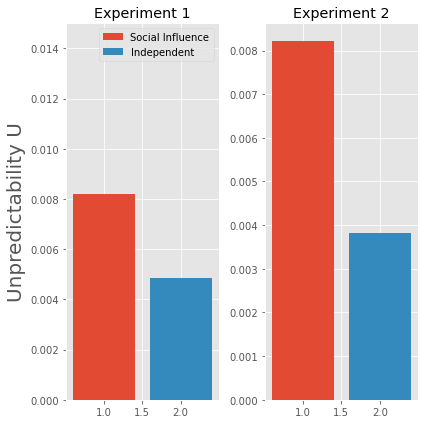

In [16]:
plt.figure(figsize = [6, 6])

plt.subplot(121)
plt.bar(1, U1, label = 'Social Influence')
plt.bar(2, np.mean(U_independent_1), label = 'Independent')
plt.ylabel('Unpredictability U', fontsize = 20)
plt.legend()
plt.ylim([0, 0.015])
plt.title('Experiment 1')

plt.subplot(122)
plt.bar(1, U1, label = 'Social Influence')
plt.bar(2, np.mean(U_independent_2), label = 'Independent')
#plt.ylim([0, 0.015])
plt.title('Experiment 2')
plt.tight_layout()


In [17]:
from scipy import stats

r = stats.ttest_1samp(U_independent_1, U1, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: -187.21734199411603
pvalue: 0.0


In [18]:
r = stats.ttest_1samp(U_independent_2, U2, axis=0)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: -631.42689271225
pvalue: 0.0


In [19]:
r = stats.ttest_ind(U_independent_1, U_independent_2)
print("statistic:", r.__getattribute__("statistic"))
print("pvalue:", r.__getattribute__("pvalue"))

statistic: 46.16080401932079
pvalue: 3.0186087e-317


In [20]:
import scipy.stats as ss

worlds = ['downloads_in_world1',
    'downloads_in_world2', 'downloads_in_world3',
    'downloads_in_world4', 'downloads_in_world5', 
    'downloads_in_world6', 'downloads_in_world7', 
    'downloads_in_world8', 'downloads_in_world_independent'] 


data1 = []
data1_rank = []
for i in df1.index:
    for j in worlds[:-1]:
        m_inf = df1[j][i]/df1[j].sum()
        m_ind = df1[worlds[-1]][i]/df1[worlds[-1]].sum()
        
        m_inf_rank = ss.rankdata(df1[j])[i]
        m_ind_rank = ss.rankdata(df1[worlds[-1]])[i]
        data1.append((m_inf, m_ind ))
        data1_rank.append((m_inf_rank, m_ind_rank))


data2 = []
data2_rank = []
for i in df2.index:
    for j in worlds[:-1]:
        m_inf = df2[j][i]/df2[j].sum()
        m_ind = df2[worlds[-1]][i]/df2[worlds[-1]].sum()
        m_inf_rank = ss.rankdata(df2[j])[i]
        m_ind_rank = ss.rankdata(df2[worlds[-1]])[i]
        data2.append((m_inf, m_ind ))
        data2_rank.append((m_inf_rank, m_ind_rank))


m_infs1 = [i for i,j in data1]
m_inds1 = [j for i,j in data1]
m_infs2 = [i for i,j in data2]
m_inds2 = [j for i,j in data2]

m_infs1_rank = [i for i,j in data1_rank]
m_inds1_rank = [j for i,j in data1_rank]
m_infs2_rank = [i for i,j in data2_rank]
m_inds2_rank = [j for i,j in data2_rank]

In [ ]:
# m_infs1_rank = ss.rankdata(m_infs1)
# m_inds1_rank = ss.rankdata(m_inds1)
# m_infs2_rank = ss.rankdata(m_infs2)
# m_inds2_rank = ss.rankdata(m_inds2)

In [22]:
plt.legend?

Signature: plt.legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will 

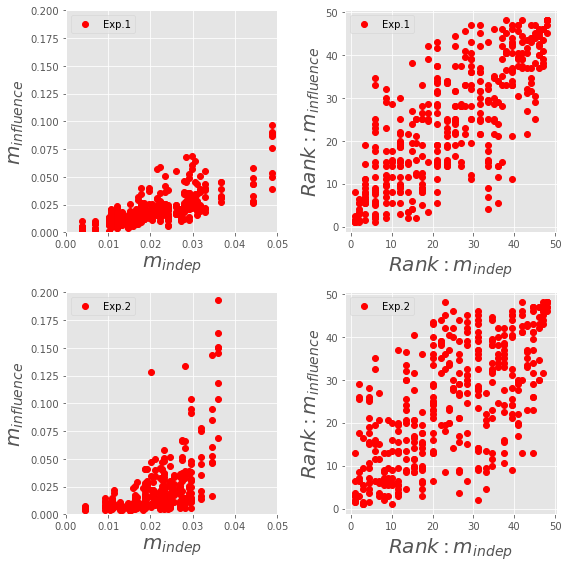

In [23]:
plt.figure(figsize = [8, 8])

plt.subplot(221)
plt.plot(m_inds1, m_infs1, 'ro', label ='Exp.1')
plt.ylim([0, 0.2])
plt.xlim([0, 0.05])
plt.ylabel('$m_{influence}$', fontsize = 20)
plt.xlabel('$m_{indep}$', fontsize = 20)
plt.legend(loc='upper left')

plt.subplot(222)
plt.plot(m_inds1_rank, m_infs1_rank, 'ro', label ='Exp.1')
plt.ylabel('$Rank: m_{influence}$', fontsize = 20)
plt.xlabel('$Rank: m_{indep}$', fontsize = 20)

plt.legend(loc='upper left')

plt.subplot(223)
plt.plot(m_inds2, m_infs2, 'ro', label ='Exp.2')
plt.ylim([0, 0.2])
plt.xlim([0, 0.05])
plt.ylabel('$m_{influence}$', fontsize = 20)
plt.xlabel('$m_{indep}$', fontsize = 20)
plt.legend(loc='upper left')

plt.subplot(224)
plt.plot(m_inds2_rank, m_infs2_rank, 'ro', label ='Exp.2')
plt.ylabel('$Rank: m_{influence}$', fontsize = 20)
plt.xlabel('$Rank: m_{indep}$', fontsize = 20)

plt.legend(loc='upper left')

plt.tight_layout()


# 实验设计：
1. 